# Анализ оттока клиентов банка "Метанпромбанк"

## Материалы

**Презентация**: https://drive.google.com/file/d/1K_Qg-taEoyvcyONnE9ESSJraidyxUurd/view?usp=sharing

## Вступление

### Краткое описание проекта

Анализ оттока клиентов регионального банка "Метанпромбанк", филиалы которого располагаются в Ярославле, Рыбинске и Великом Ростове. Необходимо выяснить, какие клиенты уходят из банка, а также составить сегменты клиентов, которые склонны уходить из банка.

### Цель проекта

Определить признаки отточности клиентов, сформировать сегменты клиентов, склонных уходить из банка, дать рекомендацию банку по уменьшению оттока клиентов.

### Задачи проекта

- Исследовать признаки клиентов.
- Выделить отточные сегменты.
- Сформулировать рекомендации по уменьшению оттока клиентов.

### Описание данных

Датасет bank_scrooge содержит данные о клиентах банка «Метанпромбанк».

Колонки:
 - USERID — идентификатор пользователя,
 - score — баллы кредитного скоринга,
 - city — город,
 - gender — пол,
 - age — возраст,
 - equity — количество баллов собственности
 - balance — баланс на счёте,
 - products — количество продуктов, которыми пользуется клиент,
 - credit_card — есть ли кредитная карта,
 - last_activity — активный клиент,
 - EST_SALARY — оценочный доход клиента,
 - сhurn — признак оттока.

### План работы

В ходе данного исследования будет создан датасет bank_scrooge, содержащий данные о клиентах банка "Метанпромбанк". Датасет будет проверен на пропуски, явные и неявные дубликаты. Столбец gender будет перекодирован в числовой формат (0 - Ж, 1 - М). Будет проведен анализ распределения признаков, в том числе в разрезе оттока (для непрерывных признаков будут определены отточные интервалы, для категориальных/дискретных будут найдены значения признака с оттоком выше, чем по банку). Будут составлены и проанализированы портреты клиентов в разрезе оттока, будет проведен и интерпретирован корреляционный анализ между исследуемыми признаками и оттоком. По итогам исследовательного анализа данных будут сформулированы и проверены статистические гипотезы. Будут сформированы и приоритезированы сегменты клиентов по признаку отточности, а также даны рекомендации банку по уменьшению оттока клиентов. Будет создана презентация в формате pdf по проведенному анализу.

- Загрузка и предобработка данных:
    - Загрузка данных
    - Вывод данных и изучение основной информации
    - Предобработка данных
    - Кодирование данных

- Исследовательский анализ данных:
    - Исследование оттока клиентов в целом по банку
    - Исследование распределения баллов кредитного скоринга
    - Исследование распределения возраста клиентов
    - Исследование распределения баланса на счёте
    - Исследование распределения количества продуктов, которыми пользуется клиент
    - Исследование распределения дохода клиентов
    - Исследование распределения клиентов по городам
    - Исследование распределения клиентов по полу
    - Исследование распределения по наличию кредитной карты
    - Исследование распределения по активности
    - Составление и анализ портретов клиентов в разрезе оттока
    - Корреляционный анализ и его интерпретация

- Формулирование и проверка статистических гипотез:
     - Проверка гипотезы различия дохода между ушедшими и не ушедшими клиентами
     - Статистическая гипотеза №2

- Сегментация клиентов по признаку отточности:
     - Сегментация клиентов
     - Приоритезация сегментов
     - Рекомендации

- Создание презентации
- Выводы

## Загрузка и предобработка данных

### Загрузка данных

In [1]:
# скачаем библиотеку phik
!pip install phik

In [2]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import phik
from scipy import stats as st
import math as mth

In [3]:
# загрузим датасет
bank_scrooge = pd.read_csv('/datasets/bank_scrooge.csv')

### Вывод данных и изучение основной информации

In [4]:
# выведем несколько строк датасета, основную информацию,
# посчитаем количество пропусков и явных дубликатов
dataframes = {
    'bank_scrooge': bank_scrooge
}

# цикл скопирован из предыдущих проектов
for name, df in dataframes.items():
    print('\033[1m' + f'Основная информация по таблице {name}' + '\033[0m')
    display(df.head(10))
    print('*'*50)
    display(df.info())
    print('*'*50)
    print(f'Кол-во пропусков в {name}: {df.isnull().sum().sum()}\n')
    print(f'Кол-во явных дубликатов в {name}: {df.duplicated().sum()}\n')

Основная информация по таблице bank_scrooge


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

**************************************************
Кол-во пропусков в bank_scrooge: 2321

Кол-во явных дубликатов в bank_scrooge: 0



В датасете нашелся 2321 пропуск. Нет единообразного стиля в названиях столбцов (используются прописные и строчные буквы). Типы столбцов score и age можно заменить на int (целочисленный тип вместо типа с плавающей запятой float), предварительно убедившись, что отсутсвуют нецелые значения.

### Предобработка данных

#### Переименование столбцов

In [5]:
# приведем названия столбцов в единообразный вид (только строчные буквы, слова разделяются нижним подчеркиванием)
bank_scrooge = bank_scrooge.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'EST_SALARY'.lower()})

#### Работа с дубликатами

In [6]:
# проверим столбцы city и gender на неявные дубликаты 
print(bank_scrooge['city'].unique())
print(bank_scrooge['gender'].unique())

['Рыбинск' 'Ярославль' 'Ростов']
['Ж' 'М']


В столбцах city и gender неявных дубликатов не найдено.

In [7]:
# посмотрим, есть ли дубликаты по столбцу user_id
bank_scrooge.duplicated(subset=['user_id'], keep=False).sum()

146

В столбце user_id найдено 146 дубликатов.

In [8]:
# посмотрим строки с дубликатами
bank_scrooge[bank_scrooge.duplicated(subset=['user_id'], keep=False)].sort_values('user_id').head(20)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


Возраст клиентов, имеющих одинаковый user_id, - разный, следовательно, это разные люди. Строки с одинаковыми user_id отличаются городом. Отсюда можно сделать вывод, что филиалы разных городов имеют независимые базы, которые были объединены в одну. То есть user_id уникален для каждого города по отельности, а не в целом по банку.

In [9]:
# проверим датасет на отсутствие дубликатов по паре столбцов: user_id и city
bank_scrooge.duplicated(subset=['user_id', 'city'], keep=False).sum()

0

Дубликатов по паре столбцов: user_id и city, - не найдено. Следовательно, моё утверждение выше верно.

Оставим эти дубликаты как есть.

#### Работа с пропусками

##### Общая информация о пропусках

In [10]:
# посмотрим, в каких конкретно столбцах есть пропуски
bank_scrooge.isnull().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

В столбце age нашлось 26 пропусков, а в столбцу balance - 2295. В остальных столбцах пропусков нет.

In [11]:
# посчитаем процент пропущенных значений
(bank_scrooge[['age', 'balance']].isna().sum() / len(bank_scrooge[['age', 'balance']])).round(4) * 100

age         0.26
balance    22.95
dtype: float64

В столбце age количество пропусков составляет всего лишь 0.26%, что довольно мало. А вот с столбце balance количество пропусков существенное - 22.95%.

##### Работа с пропусками в столбце age

In [12]:
# выведем все строки с пропусками в age и посмотрим на них
bank_scrooge[bank_scrooge['age'].isnull()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Строки с пропусками в столбце age имеют разные значения по остальным столбцам, кроме разве что столбца churn. Исследовать средние значения churn для значений с пропусками и без в случае такого маленького количества пропусков (0.26%), думаю, смысла нет. 

In [13]:
bank_scrooge.loc[: , ~bank_scrooge.columns.isin(['user_id', 'age'])]

,score,city,gender,equity,balance,products,credit_card,last_activity,est_salary,churn
0,850.0,Рыбинск,Ж,1,59214.82,2,0,1,75719.14,1
1,861.0,Рыбинск,Ж,5,850594.33,3,1,0,86621.77,0
2,892.0,Рыбинск,Ж,0,NaN,1,1,1,107683.34,0
3,866.0,Ярославль,Ж,5,1524746.26,2,0,1,174423.53,1
4,730.0,Ярославль,М,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...
9995,814.0,Рыбинск,М,1,78144.65,1,0,1,18943.64,0
9996,894.0,Ярославль,М,0,NaN,1,1,0,196898.29,0
9997,903.0,Ярославль,М,0,NaN,2,1,1,108905.09,0
9998,777.0,Ярославль,Ж,3,865457.97,3,0,1,86874.90,0


In [14]:
# создадим столбец no_age, где 1 - пропуск в age, 0 - нет пропуска
bank_scrooge['no_age'] = np.where(bank_scrooge['age'].isnull(), 1, 0)

# построим матрицу корреляции между столбцом no_age (пропуски в age) и остальными признаками
bank_scrooge.loc[: , ~bank_scrooge.columns.isin(['user_id', 'age'])].phik_matrix(
        interval_cols=['score', 'balance', 'est_salary'])[['no_age']].iloc[:-1, :]

,no_age
score,0.059585
city,0.011859
gender,0.000000
equity,0.038201
balance,0.000000
products,0.044816
credit_card,0.000000
last_activity,0.032798
est_salary,0.009403
churn,0.020515


По шкале Чеддока коэффициент корреляции ниже 0.1 означает, что зависимости нет. Все полученные коэффициенты корреляции меньше 0.1. Значит, пропуски в столбце age не коррелируют с остальными признаками.

Пометим пропуски в age как MAR (случайные пропуски) и удалим строки с пропущенными значениями в столбце age.

In [15]:
# удалим столбец no_age
del bank_scrooge['no_age']

# удалим строки с пропусками в age
bank_scrooge.dropna(axis = 'index', subset = ['age'], inplace = True)

# убедимся, что пропуски удалены
bank_scrooge.age.isna().sum()

0

##### Работа с пропусками в столбце balance

In [16]:
# посмотрим строки с пропусками в столбце balance
bank_scrooge[bank_scrooge['balance'].isnull()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.0,Ростов,М,38.0,0,NaN,1,0,0,171763.69,0
9984,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0
9993,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0


In [17]:
# создадим столбец no_age, где 1 - пропуск в age, 0 - нет пропуска
bank_scrooge['no_balance'] = np.where(bank_scrooge['balance'].isnull(), 1, 0)

# построим матрицу корреляции между столбцом no_age (пропуски в age) и остальными признаками
bank_scrooge.loc[: , ~bank_scrooge.columns.isin(['user_id', 'balance'])].phik_matrix(
        interval_cols=['score', 'age', 'est_salary'])[['no_balance']].iloc[:-1, :].sort_values('no_balance', ascending=False)

,no_balance
equity,0.975565
products,0.791714
score,0.754146
est_salary,0.429668
churn,0.380486
credit_card,0.244231
gender,0.096927
age,0.047756
last_activity,0.041335
city,0.039951


По шкале Чеддока корреляция пропусков в столбцу balance с признаком:
- equity - весьма высокая (0.98);
- products - высокая (0.79);
- score - высокая (0.75);
- est_salary - умеренная (0.43);
- churn - умеренная (0.38);
- credit_card - слабая (0.24).

Корреляция с остальными признаками отсутствует. Тем не менее, видим, что пропуски в столбце balance сильно зависимы от других признаков.

Отнесем пропуски в столбце balance к типу MNAR (неслучайные пропуски). Такие пропуски нельзя отбрасывать или заполнять по медиане/среднему, оставим их как есть.

In [18]:
# удалим столбец no_balance
del bank_scrooge['no_balance']

#### Поиск аномалий

In [19]:
# проверим, есть ли клиенты с нулевым количеством продуктов
bank_scrooge[bank_scrooge['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Есть один клиент, количество продуктов которого равняется нулю. В таком случае, данный человек клиентов банка не является. Появление такого человека в базе можно назвать аномалией и следует удалить.

In [20]:
# удалим строчку с products, равным нулю
bank_scrooge = bank_scrooge[bank_scrooge['products'] != 0]

#### Работа с типами данных

In [21]:
# проверим, что столбцы score и age содержат только целочисленные значения.
print(bank_scrooge['score'].unique())
print(bank_scrooge['age'].unique())

[ 850.  861.  892.  866.  730.  856.  807.  825.  923.  906.  927.  921.
  845.  837.  815.  731.  829.  793.  876.  922.  772.  896.  871.  732.
  898.  806.  766.  776.  868.  946.  828.  786.  944.  863.  822.  794.
  924.  811.  814.  956.  935.  826.  849.  901.  893.  792.  888.  831.
  748.  820.  860.  914.  930.  948.  789.  737.  812.  933.  809.  749.
  873.  859.  950.  937.  835.  768.  767.  785.  846.  750.  816.  894.
  891.  788.  758.  787.  821.  855.  779.  791.  838.  971.  797.  841.
  915.  985.  870.  897.  763.  774.  686. 1000.  875.  819.  869.  854.
  810.  761.  802.  958.  917.  745.  736.  908.  928.  884.  853.  780.
  726.  881.  975.  852.  965.  899.  890.  836.  818.  880.  795.  916.
  775.  902.  918.  842.  771.  895.  801.  721.  966.  804.  885.  986.
  753.  832.  979.  798.  754.  756.  823.  658.  734.  954.  827.  929.
  760.  688.  659.  817.  718.  705.  920.  652.  649.  862.  770.  824.
  934.  952.  977.  840.  709.  878.  808.  900.  7

In [22]:
# заменим типы столбцов score и age на int
bank_scrooge[['score', 'age']] = bank_scrooge[['score', 'age']].astype('int16')

### Вывод

1. Был создан датасет bank_scrooge, содержащий данные о клиентах банка «Метанпром».
2. Была изучена основная информация по датасету bank_scrooge.
3. Датафрейм был проверен на наличие явных дубликатов.
4. Датафрейм был проверен на наличие пропусков. Нашлось 26 (0.26%) пропусков в столбце age и 2295 (22.95%) пропуска в столбце balance.
5. Пропуски в столбце age были отнесены к типу MAR (случайные пропуски) и удалены.
6. Пропуски в столбце balance были отнесены к типу MNAR (неслучайные пропуски) и оставлены как есть. Было выявлено, что наличие пропусков в столбце balance зависит от equity: основная часть пропусков наблюдается при значениях equity 0 и 1.
7. Было найдено 146 дубликатов в столбце user_id. Было выяснено, что user_id уникален только в рамках конкретного города, но между городами могут быть пересечения по user_id. Клиенты, имеющий одинаковый user_id, являются разными людьми. Дубликаты оставлены как есть.
8. Был найден клиент с 0 количеством используемых продуктов банка. Данный клиент был признан аномалией и удален из датафрейма.
9. Названия столбцов были приведены к единообразному стилю: только строчные буквы, слова в названии разделены нижним подчеркиванием.
10. Типы столбцов score и age были заменены на int16 (до этого был тип float).
11. Был создан столбец gender_bool, где 1 - мужчина, 0 - женщина.

## Исследовательский анализ данных

Анализ распределения признаков будет проводится в том числе в разрезе оттока клиентов.

### Исследование оттока клиентов в целом по банку

Найдем количество ушедших клиентов в целом по банку.

In [23]:
print('Количество ушедших клиентов:', bank_scrooge['churn'].sum())
print('Процент ушедших клиентов:', bank_scrooge['churn'].mean().round(3) * 100)

Количество ушедших клиентов: 1818
Процент ушедших клиентов: 18.2


### Исследование распределения баллов кредитного скоринга

Выясним, какое количество баллов кредитного скоринга имеют клиенты банка и как они распределены. Определим, как отличаются баллы кредитного скоринга среди ушедших и не ушедших клиентов.

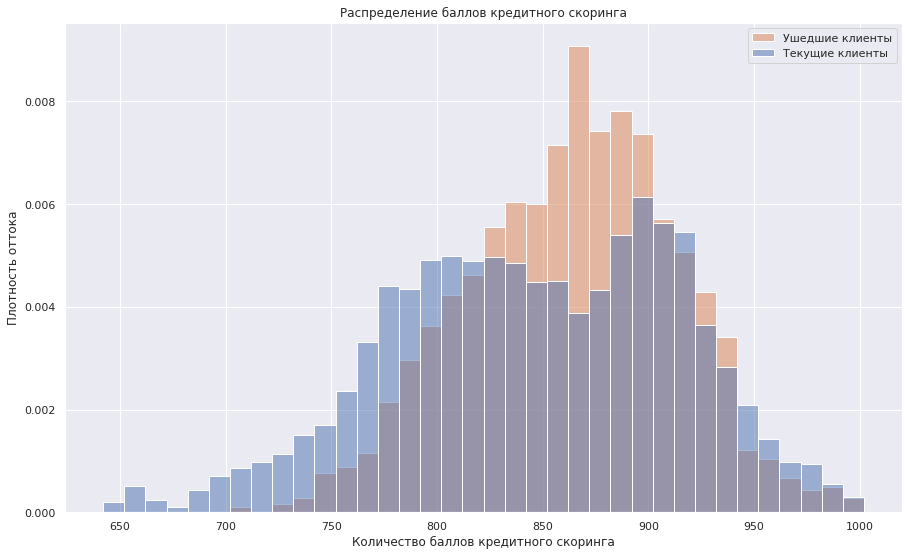

In [24]:
sns.set()

# зададим размер графика
plt.figure(figsize=(15, 9))

# построим гистограмму
sns.histplot(bank_scrooge, 
             x='score', 
             hue='churn', 
             stat='density', 
             common_norm=False,
             binwidth=10)\
    .set(title='Распределение баллов кредитного скоринга',
         xlabel='Количество баллов кредитного скоринга',
         ylabel='Плотность оттока')

# добавим легенду
plt.legend(['Ушедшие клиенты', 'Текущие клиенты']);

Как видно из графика плотности распределения, ушедших клиентов больше среди тех, кто имеет среднее количество баллов кредитного скоринга (для обладателей 830-900 баллов вероятность ухода примерно в 1.5 раза выше, чем вероятность остаться). Среди клиентов с более низким кредитным скорингом (ниже 830) больше лояльных клиентов, причем чем меньше баллов, тем больше относительнвя лояльность.

Количество баллов кредитного скоринга | Показатели оттока
:------------------------------------ | :---------------
650-725 | нет оттока
725-750 | неушедших больше в 3-4 раза, чем ушедших
750-800 | неушедших больше в 1.5-2 раза, чем ушедших
800-830 | неушедших больше на 20%, чем ушедших
830-850 | ушедших больше на 20%, чем неушедших
850-900 | ушедших больше в 1.5-2 раза, чем неушедших
900-1000 | ушедших и неушедших примерно одинаково

Интервал оттока - 830-900 баллов кредитного скоринга (score).

### Исследование распределения возраста клиентов

Исследуем возраст клиентов банка: как он распределен в целом и среди ушедших и действующих клиентов банка.

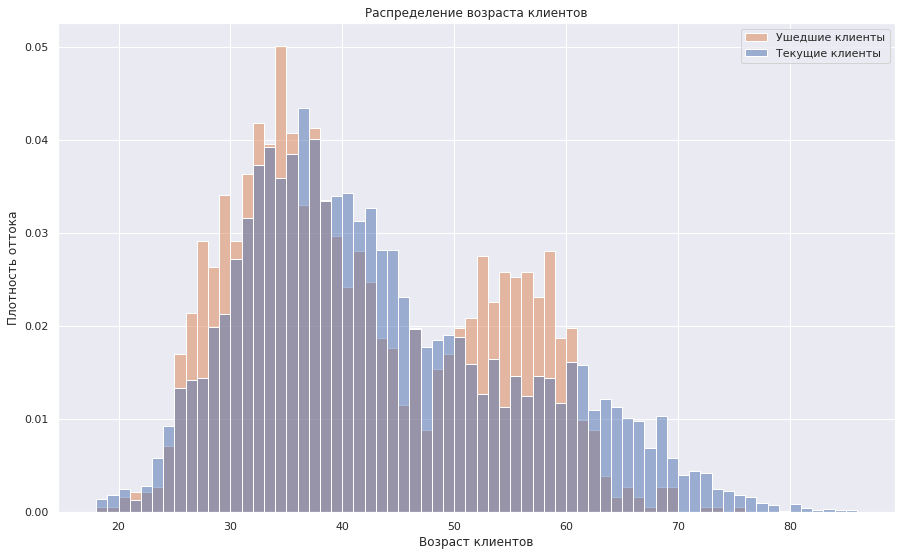

In [25]:
# зададим размер графика
plt.figure(figsize=(15, 9))

# построим гистограмму
sns.histplot(bank_scrooge, 
             x='age', 
             hue='churn', 
             stat='density', 
             common_norm=False,
             binwidth=1)\
    .set(title='Распределение возраста клиентов',
         xlabel='Возраст клиентов',
         ylabel='Плотность оттока')

# добавим легенду
plt.legend(['Ушедшие клиенты', 'Текущие клиенты']);

Самая нелояльная категория (в которой больше всего ушедших клиентов) - 50-61 год (ушедших клиентов в 2 раза больше, чем неушедших). Также больше ушедших клиентов в категории 26-35 лет, там разный процент оттока (кол-во ушедших клиентов в 1-2 раза больше, чем неушедших). Самыми лояльными оказались клиенты категории 39-49 лет и старше 61 года, причем среди самых возрастных клиентов процент оттока стремится к нулю. Молодежь (18-25 лет) также достаточно лояльна, количество ушедших клиентов среди них меньше, чем ушедших.

Возраст клиентов | Показатели оттока
:--------------- | :---------------
18-19 лет | неушедших в 3 раза больше, чем ушедших
20-22 лет | неушедших и ушедших одинаково
23-25 лет | неушедших в 1.5-2 раза больше, чем ушедших
26-29 лет | ушедших в 1.5 раза больше, чем неушедших
30-35 лет | ушедших на 10-20% больше, чем неушедших
36-49 лет | неушедших в 1.5 раза больше, чем ушедших
50-61 год | ушедших в 2 раза больше, чем неушедших
62-63 года | неушедших на 20-30% больше, чем ушедших
64-69 лет | неушедших в 3-4 раза больше, чем ушедших
70+ лет | оттока практически нет

Интервалы оттока - 26-36 лет, 50-61 год (age).

### Исследование распределения баланса на счёте

Выясним, какой баланс на счёте имеют клиенты банка и как он распределен. Определим, как отличается баланс на счёте среди ушедших и действующих клиентов банка.

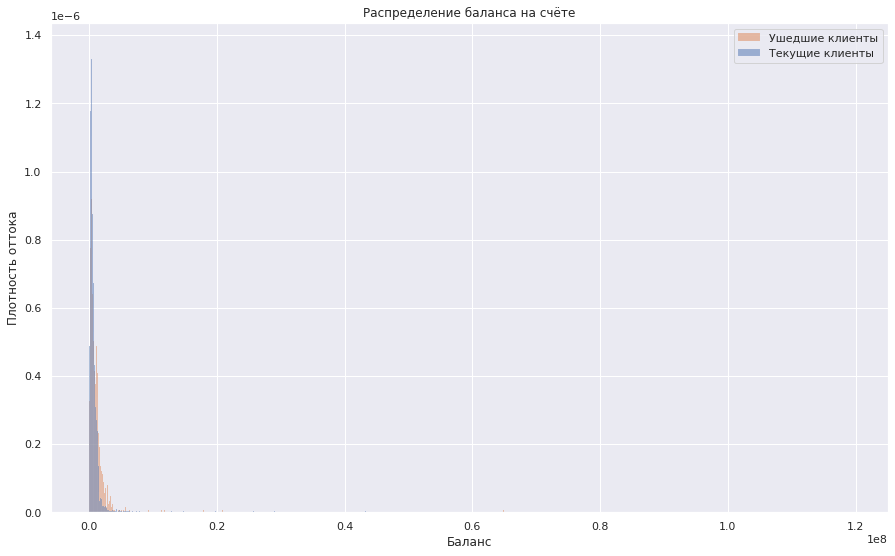

In [26]:
# зададим размер графика
plt.figure(figsize=(15, 9))

# построим гистограмму
sns.histplot(bank_scrooge, 
             x='balance', 
             hue='churn', 
             stat='density', 
             common_norm=False)\
    .set(title='Распределение баланса на счёте',
         xlabel='Баланс',
         ylabel='Плотность оттока')

# добавим легенду
plt.legend(['Ушедшие клиенты', 'Текущие клиенты']);

График получился слишком мелким. Приблизим его, ограничив диапазон по оси x.

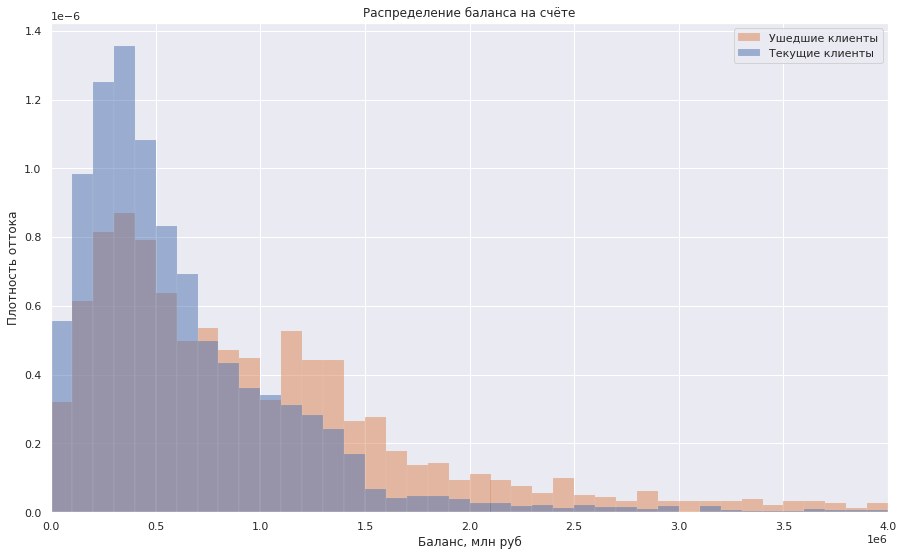

In [27]:
# зададим размер графика
plt.figure(figsize=(15, 9))

# построим гистограмму
sns.histplot(bank_scrooge, 
             x='balance', 
             hue='churn', 
             stat='density', 
             common_norm=False,
             binwidth=100000)\
    .set(title='Распределение баланса на счёте',
         xlabel='Баланс, млн руб',
         ylabel='Плотность оттока',
         xlim=(0, 4*10**6))

# добавим легенду
plt.legend(['Ушедшие клиенты', 'Текущие клиенты']);

Среди клиентов с балансом менее 700 тысяч рублей неушедших клиентов больше, чем ушедших, причем самая больше разница наблюдается в диапазоне 0-500 тысяч рублей (неушедших в 1.5 раза больше, чем ушедших). В диапазоне 700-1100 тысяч рублей на счёте ушедших и неушедших примерно поровну. Среди клиентов, имеющих более 1.1 млн рублей на счету, ушедших больше, чем неушедших (в 2-3 раза).

Баланс на счёте | Показатель оттока
:-------------- | :---------------
0-100 тыс. руб. | неушедших в 2 раза больше, чем ушедших
100-500 тыс. руб. | неушедших в 1.5 раза больше, чем ушедших
500-700 тыс. руб. | неушедших на 25-30% больше, чем ушедших
700-1100 тыс. руб. | ушедших на 0-20% больше, чем неушедших
1.1-1.5 млн руб. | ушедших в 1.5-2 раза чем неушедших
более 1.5 млн руб. | ушедших в 3-4 раза чем неушедших

Интервал оттока - 1.1 млн рублей и более на счёту клиента (balance).

### Исследование распределения количества продуктов, которыми пользуется клиент

Выясним, сколько продуктов имеют клиенты банка и как это количество различается для ушедших и действвующих клиентов.

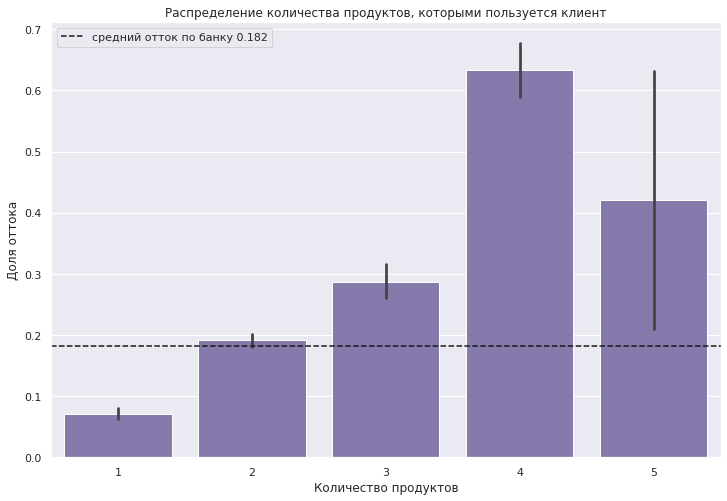

In [28]:
# зададим размер графика
plt.figure(figsize=(12, 8))

# построим гистограмму
sns.barplot(data=bank_scrooge, x='products', y='churn', color='m')\
    .set(title='Распределение количества продуктов, которыми пользуется клиент',
         xlabel='Количество продуктов',
         ylabel='Доля оттока')

# построим линию, показывающую средний уровень оттока по банку
plt.axhline(bank_scrooge['churn'].mean(), color='k', linestyle='--', label='средний отток по банку 0.182')

# добавим легенду
plt.legend();

Черной линией на графике показан средний уровень оттока по банку - 0.182 (18.2%). Клиенты, имеющие 1 или 2 продукта, не показываеют повышенный отток. Среди клиентов, имеющих 3 продукта, отток в 1.5 раза превышает средний и составляет 28%. Самый большой процент оттока имеют клиенты с 4 продуктами - 63%, что больше чем в 3 раза выше среднего значения по банку. Клиенты с 5 продуктами показывают 42%-ый отток.

Клиенты с 3-5 продуктами (products) склонны к оттоку. Самые нелояльные - клиенты с 4 продуктами.

### Исследование распределения количества баллов собственности

Посмотрим, сколько баллов собственности имеют клиенты банка и как это количество различается для ушедших и действвующих клиентов.

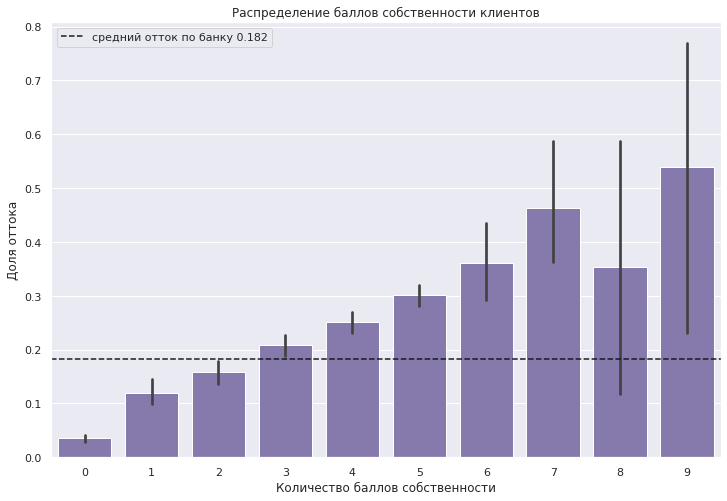

In [29]:
# зададим размер графика
plt.figure(figsize=(12, 8))

# построим гистограмму
sns.barplot(data=bank_scrooge, x='equity', y='churn', color='m')\
    .set(title='Распределение баллов собственности клиентов',
         xlabel='Количество баллов собственности',
         ylabel='Доля оттока')

# построим линию, показывающую средний уровень оттока по банку
plt.axhline(bank_scrooge['churn'].mean(), color='k', linestyle='--', label='средний отток по банку 0.182')

# добавим легенду
plt.legend();

Клиенты, имеющие большее количество баллов собственности, более склонны к оттоку. Причем зависимость практически линейная - чем больше баллов собственности, тем больше доля оттока. При количестве баллов 0-2 доля оттока ниже, чем в целом по банку, а при количестве баллов 3-9 - выше. Самую маленькую долю оттока показывают клиенты с 0 баллов собственности - около 0.03, самую большую - клиенты с 9 баллами собственности (самое большое значение данной признака в датафрейме) - около 0.54.

Клиенты с 3-9 баллами собственности склонны к оттоку. В целом, чем больше баллов собственности, тем менее лояльны клиенты.

### Исследование распределения дохода клиентов

Посмотрим, как распределяется доход клиентов банка в целом и в разрезе оттока клиентов.

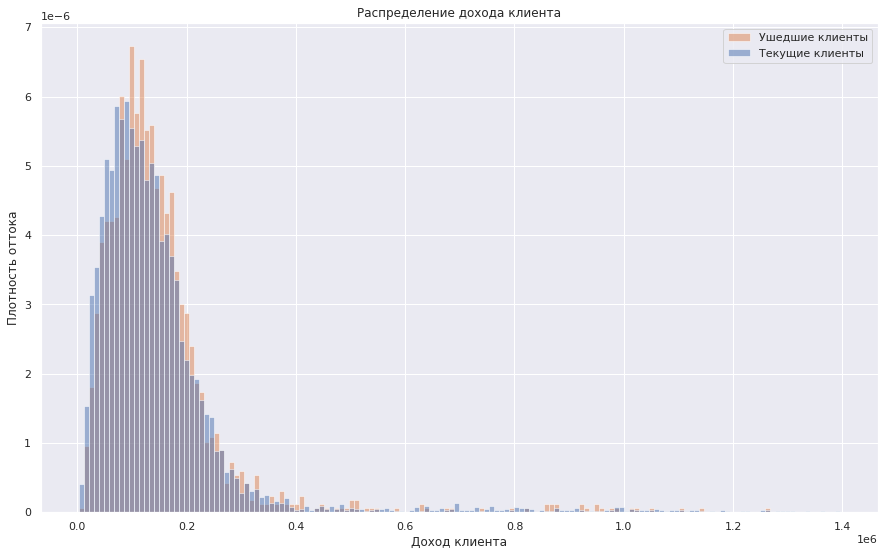

In [30]:
# зададим размер графика
plt.figure(figsize=(15, 9))

# построим гистограмму
sns.histplot(bank_scrooge, 
             x='est_salary', 
             hue='churn', 
             stat='density', 
             common_norm=False)\
    .set(title='Распределение дохода клиента',
         xlabel='Доход клиента',
         ylabel='Плотность оттока')

# добавим легенду
plt.legend(['Ушедшие клиенты', 'Текущие клиенты']);

Обрежем график по оси x, чтобы подробнее рассмотреть его.

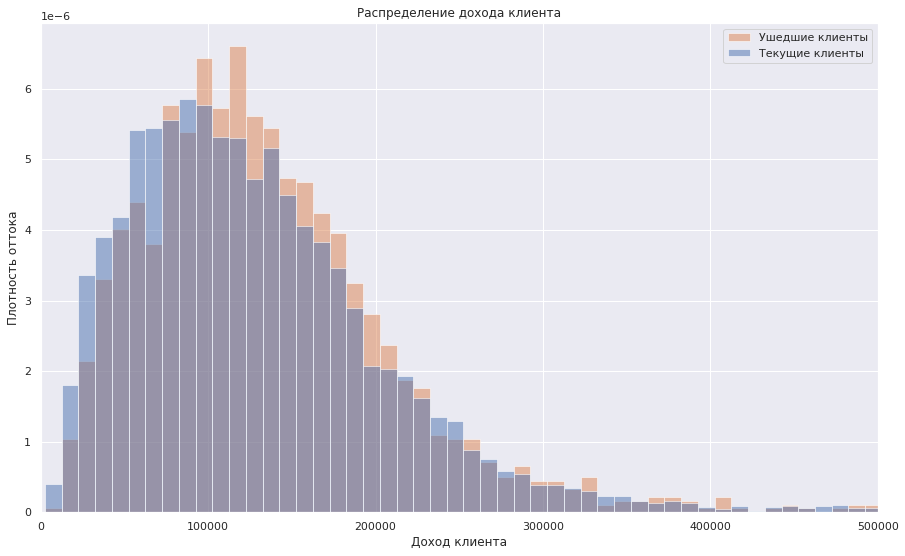

In [31]:
# зададим размер графика
plt.figure(figsize=(15, 9))

# построим гистограмму
sns.histplot(bank_scrooge, 
             x='est_salary', 
             hue='churn', 
             stat='density', 
             common_norm=False,
             binwidth=10000)\
    .set(title='Распределение дохода клиента',
         xlabel='Доход клиента',
         ylabel='Плотность оттока',
         xlim=(0, 5*10**5))

# добавим легенду
plt.legend(['Ушедшие клиенты', 'Текущие клиенты']);

Среди клиентов, имеющих доход ниже 80 тыс. руб., больше неушедших, чем ушедших (на 5-50%). Клиенты с доходом 100-200 тыс. руб. являются самыми нелояльными, среди них ушедших больше (на 5-20%). Среди Клиентов с доходом выше 200 тыс. руб. склонных к оттоку примерно столько же, сколько и склонных оставаться клиентами банка.

Интервал оттока - клиенты с доходом (est_salary) 100-200 тыс. рублей.

### Исследование распределения клиентов по городам

Выясним, сколько клиентов обслуживают банки городов Ярославль, Рыбинск и Великий Ростов и какой процент отточности имеют данные города.

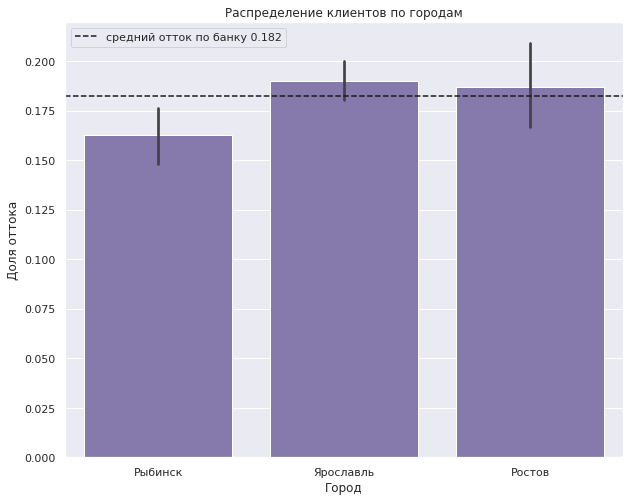

In [32]:
# зададим размер графика
plt.figure(figsize=(10, 8))

# построим гистограмму
sns.barplot(data=bank_scrooge, x='city', y='churn', color='m')\
    .set(title='Распределение клиентов по городам',
         xlabel='Город',
         ylabel='Доля оттока')

# построим линию, показывающую средний уровень оттока по банку
plt.axhline(bank_scrooge['churn'].mean(), color='k', linestyle='--', label='средний отток по банку 0.182')

# добавим легенду
plt.legend();

В городе Рыбинск отток ниже среднего значения (16.25% при среднем 18.2%). Ярославль и Ростов имеют показатели оттока выше среднего (приблизительно 19% и 18.5% соответственно). Ярославль имеет самый большой процент оттока.

Города, в который больше отток - Ярославль и Ростов (больше Ярославль).

### Исследование распределения клиентов по полу

Посмотрим, какого пола клиенты банка и среди представителей какого пола можно увидеть бОльший отток клиентов.

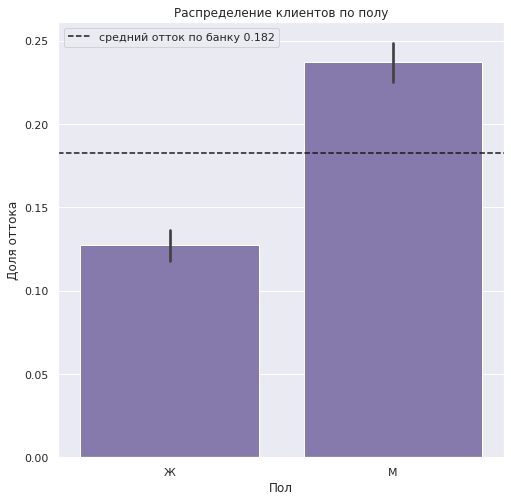

In [33]:
# зададим размер графика
plt.figure(figsize=(8, 8))

# построим гистограмму
sns.barplot(data=bank_scrooge, x='gender', y='churn', color='m')\
    .set(title='Распределение клиентов по полу',
         xlabel='Пол',
         ylabel='Доля оттока')

# построим линию, показывающую средний уровень оттока по банку
plt.axhline(bank_scrooge['churn'].mean(), color='k', linestyle='--', label='средний отток по банку 0.182')

plt.legend();

Доля оттока среди мужчин больше - около 23.5% при среднем оттоке в 18.2%. Среди женщин наблюдается низкий отток клиентов - всего 12.5%.

Мужчины наиболее склонны к оттоку.

### Исследование распределения клиентов по наличию кредитной карты

Выясним, сколько клиентов банка имеет кредтную карту и как наличие или отсутствие кредитной карты влияет на отточность.

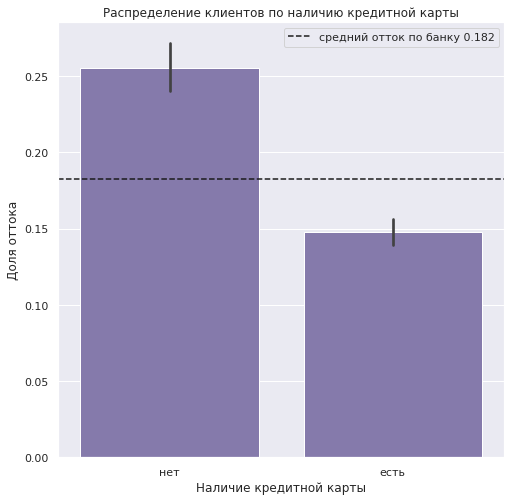

In [34]:
# зададим размер графика
plt.figure(figsize=(8, 8))

# добавим столбец credit_card_str с текстовой пометкой есть/нет кредитной карты
bank_scrooge['credit_card_str'] = np.where(bank_scrooge['credit_card'] == 1, 'есть', 'нет')

# построим гистограмму
sns.barplot(data=bank_scrooge, x='credit_card_str', y='churn', color='m')\
    .set(title='Распределение клиентов по наличию кредитной карты',
         xlabel='Наличие кредитной карты',
         ylabel='Доля оттока')

# построим линию, показывающую средний уровень оттока по банку
plt.axhline(bank_scrooge['churn'].mean(), color='k', linestyle='--', label='средний отток по банку 0.182')

# добавим легенду
plt.legend();

# удалим столбец credit_card_str
del bank_scrooge['credit_card_str']

Более склонны к оттоку клиенты, не имеющие кредитной карты (процент оттока 26% при среднем значении 18.2%). Клиенты, имеющие кредитную карту, склонны к оттоку меньше, чем в среднем по банку (около 15%).

Больший отток - у клиентов, не имеющих кредитной карты.

### Исследование распределения клиентов по активности

Посмотрим, какое количество клиентов банк пометил как "активный клиент" и каковы показатели отточности среди "активных" и "неактивных" клиентов.

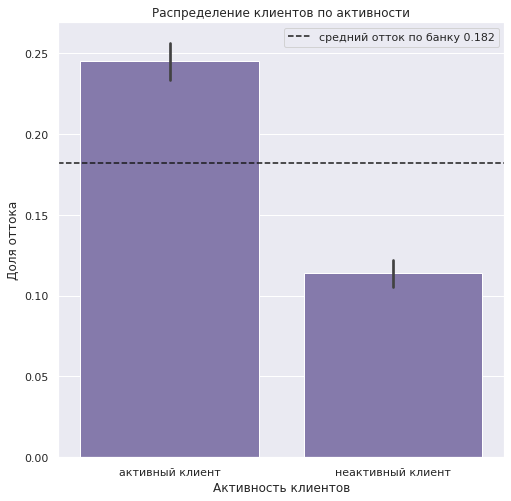

In [35]:
# зададим размер графика
plt.figure(figsize=(8, 8))

# добавим столбец last_activity_str с текстовой пометкой активный/неактивный клиент
bank_scrooge['last_activity_str'] = np.where(bank_scrooge['last_activity'] == 1, 'активный клиент', 'неактивный клиент')

# построим гистограмму
sns.barplot(data=bank_scrooge, x='last_activity_str', y='churn', color='m')\
    .set(title='Распределение клиентов по активности',
         xlabel='Активность клиентов',
         ylabel='Доля оттока')

# построим линию, показывающую средний уровень оттока по банку
plt.axhline(bank_scrooge['churn'].mean(), color='k', linestyle='--', label='средний отток по банку 0.182')

# добавим легенду
plt.legend();

# удалим столбец last_activity_str
del bank_scrooge['last_activity_str']

Среди активных клиентов больше ушедших (около 24.5% активных клиентов перестали пользоваться услугами банка при среднем уровне оттока в 18.2%). Среди же неактивных клиентов процент оттока оказался весьма небольшим - всего 12%.

Больший отток наблюдается среди активных клиентов.

### Составление и анализ портретов клиентов в разрезе оттока

Составим портреты типичных клиентов, наиболее и наименее склонных к оттоку, и сравним их.

In [36]:
# составим сводную таблицу по мерам центральных тенденций признаков в разрезе оттока
pt = pd.pivot_table(bank_scrooge, 
               values=bank_scrooge.columns, 
               columns=['churn'], 
               aggfunc={
                   'age': [lambda x: x.mean().round(), 'median'],
                   'balance': [lambda x: x.mean().round(), 'median'],
                   'credit_card': lambda x: x.mode(),
                   'equity': 'median',
                   'est_salary': [lambda x: x.mean().round(), 'median'],
                   'last_activity': lambda x: x.mode(),
                   'products': 'median',
                   'score': [lambda x: x.mean().round(), 'median'],
                   'city': lambda x: x.mode(),
                   'gender': lambda x: x.mode()
               })

# переименуем столбцы и поменяем их местами
pt = pt[[1, 0]].rename(columns={0:'Не отток', 1: 'Отток'})

# добавим столбец относительной разницы
pt['Относительная разница, %'] = '-'
for i in [0, 2, 7, 12]:
    pt.iloc[i,2] = round((pt.iloc[i, 0] - pt.iloc[i, 1]) / pt.iloc[i, 0], 3) * 100

# переименуем индексы
pt = pt.reset_index(drop=True)
pt.index.rename('Мера и признак', inplace= True)
pt.rename(index={
    0: 'Средний возраст',
    1: 'Медианный возраст',
    2: 'Средний баланс',
    3: 'Медианный баланс',
    4: 'Мода по городу',
    5: 'Мода по наличию кредитной карты',
    6: 'Медианный балл собственности',
    7: 'Средний доход',
    8: 'Медианный доход',
    9: 'Мода по полу',
    10: 'Мода по активности',
    11: 'Медианное количество продуктов',
    12: 'Средний кредитный скоринг',
    13: 'Медианный кредитный скоринг'
}, inplace= True)

# выведем заголовок и таблицу
print('Анализ портретов клиентов в разрезе оттока')
pt

Анализ портретов клиентов в разрезе оттока


churn,Отток,Не отток,"Относительная разница, %"
Мера и признак,,,
Средний возраст,41,43,-4.9
Медианный возраст,39,40,-
Средний баланс,1134458.0,733032.0,35.4
Медианный баланс,783908.9,475410.09,-
Мода по городу,Ярославль,Ярославль,-
Мода по наличию кредитной карты,1,1,-
Медианный балл собственности,4,3,-
Средний доход,148357.0,147675.0,0.5
Медианный доход,125408.88,118227.6,-


Портрет типичного клиента, склонного в оттоку: мужчина в возрасте 39-41 из города Ярославль, имеющий 800 тыс. - 1.1 млн рублей на счету, средний доход которого составляет 125-148 тыс. руб, имеющий 4 балла собственности, кредитную карту и 2 продукта банка, кредитный скоринг в районе 860-870 баллов, являющийся активным клиентом.

Портрет типичного клиента, НЕ склонного в оттоку: женщина в возрасте 40-43 из города Ярославль, имеющая 475-730 тыс. руб. на счету, средний доход которой составляет 118-148 тыс. руб., имеющая 3 балла собственности, кредитную карту и 2 продукта банка, кредитный скоринг которой в районе 840-850, не являющаяся активным клиентом.

Основные различия в тенденции к оттоку: пол (мужчины более склонны к оттоку, чем женщины), баланс счёта (люди с более низким балансом реже склонны к оттоку), активность клиента (менее активные клиенты реже уходят).

Признаки, не влияющие или слабо влияющие на отток: возраст, город, средний доход, наличие кредитной карты, количество продуктов, кредитный скоринг.

### Корреляционный анализ и его интерпретация

Найдем корреляцию между различными признаками клиентов и отточностью.

Тепловая карта корреляции между признаками клиентов и отточностью


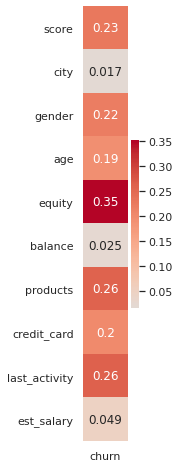

In [37]:
# зададим размер графика
plt.figure(figsize=(1, 8))

print('Тепловая карта корреляции между признаками клиентов и отточностью')

# построим тепловую карту
sns.heatmap(
    # строим матрицу корреляции
    bank_scrooge.loc[: , ~bank_scrooge.columns.isin(['user_id'])].phik_matrix(
        # задаем список непрерывных признаков, выбираем столбец churn и убираем ненужные строки
        interval_cols=['score', 'age', 'balance', 'est_salary'])[['churn']].iloc[:-1, :], 
        # задаем цветовую схему
        cmap='coolwarm', 
        # центрируем 0 на цветовой схеме
        center=0,
        # добавляем аннотации
        annot=True);

По шкале Чеддока умеренный уровень корреляции с отточностью показал признак equity (кол-во баллов собственности), коэффициент корреляции - 0.35. Слабо коррелируют с отточностью score (количество баллов кредитного скоринга), gender (пол), age (возраст), products (количество продуктов, которыми пользуется клиент), credit_card (наличие кредитной карты) и last_activity (активность клиента). Коэффициенты корреляции вышеуказанных признаков с отточностью составляют 0.19-0.26. Признаки city (город), balance (баланс на счете) и est_salary (оценочный доход клиента) не коррелируют с признаком оттока.

Корреляция с оттоком | Признаки
:------------------- | :------
Умеренная | equity
Слабая | score, gender, age, products, credit_card, last_activity
Отсутсвует | city, balance, est_salary

### Вывод

1. Общее количество ушедших клиентов: 1818 (18.2%).
2. Интервалы оттока (в скобках указан коэффициент оттока):
    - 830-900 баллов кредитного скоринга (55-66%);
    - 26-36 лет, 51-61 год (52-80%);
    - 1.1 млн рублей и более на счёту клиента (60-80%);
    - 3-5 продуктов банка, которыми пользуется клиент (28-63%);
    - оценочный доход 100-200 тыс. рублей (51-55%);
    - 3-9 баллов собственности (21-54%)
3. Наиболее склонны к оттоку (в скобках указан коэффициент оттока):
    - клиенты из городов Ярославль, Ростов (18.5-19%);
    - мужчины (23.5%);
    - клиенты, не имеющие кредитную карту (26%);
    - активные клиенты (24.5%).
4. Портрет типичного клиента, склонного в оттоку: мужчина в возрасте 39-41 из города Ярославль, имеющий 800 тыс. - 1.1 млн рублей на счету, средний доход которого составляет 125-148 тыс. руб, имеющий 4 балла собственности, кредитную карту и 2 продукта банка, кредитный скоринг в районе 860-870 баллов, являющийся активным клиентом.
5. Портрет типичного клиента, НЕ склонного в оттоку: женщина в возрасте 40-43 из города Ярославль, имеющая 475-730 тыс. руб. на счету, средний доход которой составляет 118-148 тыс. руб., имеющая 3 балла собственности, кредитную карту и 2 продукта банка, кредитный скоринг которой в районе 840-850, не являющаяся активным клиентом.
6. Основные различия в тенденции к оттоку: пол (мужчины более склонны к оттоку, чем женщины), баланс счёта (люди с более низким балансом реже склонны к оттоку, относительная разница - 34.5%), активность клиента (менее активные клиенты реже уходят).
7. Умеренную корреляцию с отточностью показал признак equity (количество баллов собственности). Коэффициент корреляции составил 0.35. Все остальные признаки показали слабую или нулевую корреляцию.
Корреляция с оттоком | Признаки
:------------------- | :------
Умеренная  0.3-0.5 | equity
Слабая     0.1-0.3| score, gender, age, products, credit_card, last_activity
Отсутсвует 0-0.1| city, balance, est_salary

## Формулирование и проверка статистических гипотез

Создадим отдельные датасеты для ушедших и неушедших клиентов для удобства дальнешего использования.

In [38]:
churned_custimers = bank_scrooge[bank_scrooge['churn'] == 1] # ушедшие клиенты
not_churned_custimers = bank_scrooge[bank_scrooge['churn'] == 0] # неушедшие клиенты

### Проверка гипотезы различия среднего количества баллов кредитного скоринга между ушедшими и действующими клиентами

По матрице корреляции признак количества баллов кредитного скоринга слабо коррелирует с отточностью по шкале Чеддока. Проверим, что это значит: есть или нет статистически значимые различия между средними баллами кредитного скоринга между ушедшими и неушедшими клиентами.

Посмотрим количество наблюдений в независимых выборках: 
- 1 выборка - ушедшие клиенты,
- 2 выборка - неушедшие (действующие) клиенты

In [39]:
print('Количество ушедших клиентов:', churned_custimers.count()['score'])
print('Количество действующих клиентов:', not_churned_custimers.count()['score'])

Количество ушедших клиентов: 1818
Количество действующих клиентов: 8155


Как видно, выборки довольно большие. Следовательно, по ЦПТ они должны быть распределены нормально. Значит, мы можем использовать t-тест Стьюдента и сравнить среднее двух этих выборок. Так как выборки разного размера, есть основания полагать, что они могут иметь разные дисперсии, поэтому установим параметр equal_var = False, чтобы тест посчитал дисперсии выборок по отдельности.  

Также не вполне корректно применять t-критерий Стьюдента при наличии в данных значительного числа выбросов. Проверим, есть ли выбросы в выборках с помощью боксплота.

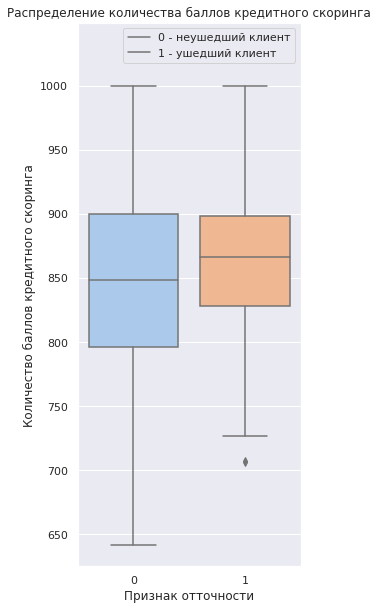

In [40]:
# задаем размер графика
plt.figure(figsize=(4, 10))
# зададим диапазон оси y
plt.ylim(625, 1049)

# строим боксплот
sns.boxplot(x='churn', y='score', data=bank_scrooge, palette='pastel')\
    .set(title='Распределение количества баллов кредитного скоринга',
         xlabel='Признак отточности',
         ylabel='Количество баллов кредитного скоринга')

# добавим легенду
plt.legend(['0 - неушедший клиент', '1 - ушедший клиент'], loc='upper right');

По графику видно, что выборка неушедших клиентов не имеет выбросов. А выборка ушедших клиентов содержит один выброс в районе 700 баллов.

In [41]:
# проверим точное значение этого выброса
churned_custimers['score'].min()

706

In [42]:
# исключим этот выброс из датасета ушедших клиентов
churned_custimers = churned_custimers[churned_custimers['score'] > 706]

Нулевая гипотеза (H₀): средние значения количества баллов кредитного скоринга среди ушедших и действующих клиентов равны.

Альтернативная гипотеза (H₁): средние значения количества баллов кредитного скоринга среди ушедших и действующих клиентов не равны.

Уровень значимости возьмем равным 0.001, так как размеры выборок больше 1000.

In [43]:
alpha = 0.001 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(churned_custimers['score'], not_churned_custimers['score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.6590041928364723e-38
Отвергаем нулевую гипотезу


С вероятностью 99.9% можно сказать, что есть статистически значимые различия между средним количеством баллов кредитного ушедших и неушедших клиентов. Ошибка первого рода исключена, получилось очень маленькое p-value (~1.3∙10^(-37)).

Так как матрица корреляции phik (п. 4.13) не показывает направление корреляции, по графику распределения количества баллов кредитного скоринга (п. 4.2) в разрезе оттока также не очень понятно направление корреляции, выведем коэффициент корреляции методом corr между кредитным скорингом и отточностью. 

In [44]:
bank_scrooge.corr().iloc[1,9]

0.10607612640846419

Коэффициент корреляции получился положительным. Значит, больший кредитный скоринг коррелирует с большей склонностью к оттоку.

### Проверка гипотезы о равенстве долей мужчин между группами ушедших и действующих клиентов

Проверим группы ушедших и неушедших клиентов на различия в признаке гендера. Так как этот признак бинарный, t-тест и другие тесты со средним не подойдут, будем использовать тест пропорций.

Нулевая гипотеза (H₀): доли мужчин среди групп ушедших и неушедших клиентов равны.

Альтернативная гипотеза (H₁): доли мужчин среди групп ушедших и неушедших клиентов не равны.

Уровень значимости возьмем равным 0.001, так как размеры выборок больше 1000.

In [45]:
alpha = 0.001 # критический уровень статистической значимости

# количество активных клиентов среди ушедших и неушедших соответственно
successes = [churned_custimers[churned_custimers['gender'] == 'М'].count()['gender'], 
             not_churned_custimers[not_churned_custimers['gender'] == 'М'].count()['gender']]
# количество клиентов среди ушедших и неушедших соответственно
trials = [churned_custimers.count()['gender'], not_churned_custimers.count()['gender']]


# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


Между долями мужчин групп ушедших и неушедших клиентов есть значимая разница. p-value равен 0, ошибка первого рода исключена.

### Вывод

1. Есть статистически значимые различия между средним количеством баллов кредитного ушедших и неушедших клиентов. Чем больше кредитный скоринг, тем больше клиент склонен к оттоку.
2. Среди ушедших клиентов доля мужчин значимо больше.

## Промежуточные итоги

1. Общее количество ушедших клиентов: 1818 (18.2%).
2. Интервалы оттока (в скобках указан коэффициент оттока):
    - 830-900 баллов кредитного скоринга (55-66%);
    - 26-36 лет, 51-61 год (52-80%);
    - 1.1 млн рублей и более на счёту клиента (60-80%);
    - 3-5 продуктов банка, которыми пользуется клиент (28-63%);
    - оценочный доход 100-200 тыс. рублей (51-55%);
    - 3-9 баллов собственности (21-54%)
3. Наиболее склонны к оттоку (в скобках указан коэффициент оттока):
    - клиенты из городов Ярославль, Ростов (18.5-19%);
    - мужчины (23.5%);
    - клиенты, не имеющие кредитную карту (26%);
    - активные клиенты (24.5%).
4. Портрет типичного клиента, склонного в оттоку: мужчина в возрасте 39-41 из города Ярославль, имеющий 800 тыс. - 1.1 млн рублей на счету, средний доход которого составляет 125-148 тыс. руб, имеющий 4 балла собственности, кредитную карту и 2 продукта банка, кредитный скоринг в районе 860-870 баллов, являющийся активным клиентом.
5. Портрет типичного клиента, НЕ склонного в оттоку: женщина в возрасте 40-43 из города Ярославль, имеющая 475-730 тыс. руб. на счету, средний доход которой составляет 118-148 тыс. руб., имеющая 3 балла собственности, кредитную карту и 2 продукта банка, кредитный скоринг которой в районе 840-850, не являющаяся активным клиентом.
6. Основные различия в тенденции к оттоку: пол (мужчины более склонны к оттоку, чем женщины), баланс счёта (люди с более низким балансом реже склонны к оттоку, относительная разница - 34.5%), активность клиента (менее активные клиенты реже уходят).
7. Есть статистически значимые различия между средним количеством баллов кредитного ушедших и неушедших клиентов. Чем больше кредитный скоринг, тем больше клиент склонен к оттоку.
8. Среди ушедших клиентов доля мужчин значимо больше.
9. С учётом построения матрицы корреляции и проверенных статистических гипотез можно составить таблицу влияния различных признаков на отток:
Признаки | Корреляция с оттоком | Коэфф. корреляции | Есть стат. знач. различия между уш. и неуш. клиентами по признаку
:------------------- | :------ | :------ | :------
equity | Умеренная | 0.35 | да
score, gender, age, products, credit_card, last_activity |Слабая | 0.19-0.26 | да
city, balance, est_salary | Отсутсвует | 0.017-0.049 | нет
10. В последующей сегментации будем использовать следующие признаки:
- equity (количество баллов собственности): 3 - 9 (или 5-9)
- products (количество продуктов, которыми пользуется клиент): 3-5
- last_activity (активный клиент): 1
- score (количество баллов кредитного скоринга): 830-900
- age (возраст): 26-35 или 50-61
- gender (пол): мужчина
- credit_card (наличие кредитной карты): 1

## Сегментация клиентов по признаку отточности

### Сегментация клиентов

Выделим неузкие сегменты (от 500 клиентов на сегмент), где отток выше, чем средний уровень оттока по банку. 

Сегмент №1:
- equity (количество баллов собственности): 3 - 9
- products (количество продуктов, которыми пользуется клиент): 3-5  
- credit_card (наличие кредитной карты) : 0

Сегмент №2:
- last_activity (активный клиент): 1
- score (количество баллов кредитного скоринга): 830-900
- age (возраст): 26-35
- gender (пол): мужчина

Сегмент №3:
- credit_card (наличие кредитной карты) : 0
- age (возраст): 50-61
- score (количество баллов кредитного скоринга): 830-900

In [46]:
# выделяем сегмент №1
segment1 = bank_scrooge[bank_scrooge['equity']//3 >= 1]
segment1 = segment1[segment1['products'] >= 3]
segment1 = segment1[segment1['credit_card'] == 0]

# выделяем сегмент №2
segment2 = bank_scrooge[bank_scrooge['last_activity'] == 1]
segment2 = segment2[abs(segment2['score']-865 <= 35)]
segment2 = segment2[segment2['age'] >= 26]
segment2 = segment2[segment2['age'] <= 35]
segment2 = segment2[segment2['gender'] == 'М']


# выделяем сегмент №3
segment3 = bank_scrooge[bank_scrooge['credit_card'] == 0]
segment3 = segment3[segment3['age'] >= 50]
segment3 = segment3[segment3['age'] <= 61]
segment3 = segment3[abs(segment3['score']-865 <= 35)]

# выведем количество клиентов на каждый сегмент
print(f'В сегменте 1: {segment1.shape[0]} чел.')
print(f'В сегменте 2: {segment2.shape[0]} чел.')
print(f'В сегменте 3: {segment3.shape[0]} чел.')

В сегменте 1: 664 чел.
В сегменте 2: 671 чел.
В сегменте 3: 582 чел.


Сегменты получились оптимального размера.

In [47]:
# проверим, выше ли отточность у описанных выше сегментов, чем в среднем по банку
print('Процент отточности в среднем по банку:', (bank_scrooge['churn'].sum()/bank_scrooge.shape[0]*100).round(2))
print('Процент отточности в сегменте 1:', (segment1['churn'].sum()/segment1.shape[0]*100).round(2))
print('Процент отточности в сегменте 2:', (segment2['churn'].sum()/segment2.shape[0]*100).round(2))
print('Процент отточности в сегменте 3:', (segment3['churn'].sum()/segment3.shape[0]*100).round(2))

Процент отточности в среднем по банку: 18.23
Процент отточности в сегменте 1: 35.54
Процент отточности в сегменте 2: 33.38
Процент отточности в сегменте 3: 33.68


В каждом сегменте отточность выше, чем в среднем по банку.

### Приоритезация сегментов

Приоритезируем выделенные сегменты: от наиболее высокого уровня оттока к наименее высокому.

Сегмент | Процент оттока
:------ | :------------
1 | 35.54%
3 | 33.68%
2 | 33.38%

Самый приоритетный сегмент - сегмент №1 (3-9 баллов собственности, 3-5 продуктов, нет кредитной карты). Именно с него стоит начать работу.

На втором месте - сегмент №3 (нет кредитной карты, 50-61 год, 830-900 баллов кредитного скоринга).

На третьем месте - сегмент №2 (активный клиент, 830-900 баллов кредитного скоринга, мужчина 26-35 лет).

### Рекомендации

Рекомендации по сегменту №1:

1. Большое количество продуктов банка у одного клиента повышает его склонность к оттоку. В связи с этим рекомендую не предлагать незаинтересованному (до тех пор, пока клиент сам не проявил инетерес к конкретному продукту) клиенту дополнительные продукты в случае, если он пользуется 2 или более продуктами банка. Вероятно, большая нагрузка на клиента приводит к его нелояльности.

2. Клиенты, имеющие кредитную карту, более склонны к оттоку, чем не имеющие. В связи с этим рекомендую провести анализ тарифов и условий банка по кредитным картам. Сделать условия по кредитным картам более выгодными и измерить уровень оттока после введения этих изменений.

Рекомендации по сегменту №2:

1. Провести анализ тарифов и условий банка по кредитным картам. Сделать условия по кредитным картам более выгодными и измерить уровень оттока после введения этих изменений.

2. Клиенты со средним кредитным скорингом склонны к оттоку сильнее, чем клиенты с низким или высоким кредитным скорингом. В связи с этим рекомендую предлагать клиентам со скорингом 830-900 баллов продукты с лучшими условиями. Вероятно, другие банки предлагают лучшие условия сотрудничества клиентом со средним кредитным скорингом.

3. Высокий отток показывают клиенты в возрасте 50-60 лет. Вероятно, стоит предложить для этой категории клиентов простые и понятные продукты накопления и инвестиций.

Рекомендации по сегменту №3:

1. Активные клиенты более склонны к оттоку. В связи с этим рекомендую повысить качество работы службы поддержки. Возможно, активным клиентам приходится быть таковыми из-за того, что без активного участия решить некоторые вопросы этих клиентов не представляется возможным. Возможность быстро и легко решать вопросы и проблемы клиентов позволит повысить их лояльность.

2. Предлагать клиентам со скорингом 830-900 баллов продукты с лучшими условиями.

3. Клиенты в возрасте 26-35 лет более склонны к оттоку, чем клиенты до 26 или 36-49 лет. Людей данной возрастной категории чаще всего объединяет: покупка первого семейного жилья (не студия), ремонт, покупка мебели, покупка автомобиля среднего класса, рождение ребенка. Я бы рекомендовала предлагать таким клиентам продукты по ипотеке (на одно-, двух-, трехкомнатные квартиры), в том числе семейной, в том числе с использованием маткапитала, кредиты на мебель (возможно, сотрудничать с мебельными/строительными магазинами), кредиты на автомобили.

### Вывод

1. Были выделены следующие сегменты (сегменты приведены в таблице в порядке приоритета):
№ сегмента | Описание | Размер | Процент оттока
:------ | :------------ | :------------ | :------------
1 | 3-9 баллов собственности, 3-5 продуктов, нет кредитной карты | 664 | 35.54%
3 | нет кредитной карты, 50-61 год, 830-900 баллов кредитного скоринга | 582 | 33.68%
2 | активный клиент, 830-900 баллов кредитного скоринга, мужчина 26-35 лет | 671 |33.38%

2. Были даны следующие рекомендации к указанным сегментам:

Рекомендации по сегменту №1:
- не предлагать незаинтересованному (до тех пор, пока клиент сам не проявил инетерес к конкретному продукту) клиенту дополнительные продукты в случае, если он пользуется 2 или более продуктами банка;
- провести анализ тарифов и условий банка по кредитным картам.

Рекомендации по сегменту №2:
- провести анализ тарифов и условий банка по кредитным картам;
- предлагать клиентам со скорингом 830-900 баллов продукты с лучшими условиями;
- предложить для клиентов 50-60 лет простые и понятные продукты накопления и инвестиций.

Рекомендации по сегменту №3:
- повысить качество работы службы поддержки;
- предлагать клиентам со скорингом 830-900 баллов продукты с лучшими условиями;
- предлагать клиентам 26-35 лет продукты по ипотеке (на одно-, двух-, трехкомнатные квартиры), в том числе семейной, в том числе с использованием маткапитала, кредиты на мебель (возможно, сотрудничать с мебельными/строительными магазинами), кредиты на автомобили.

## Выводы

В ходе данного исследования был создан датасет bank_scrooge, содержащий данные о клиентах банка "Метанпромбанк". Была проверена обработка пропусков и аномалий, найдено и объяснено наличие дубликатов по столбцу user_id, названия столбцов были приведены к единообразному стилю. Был создан столбец gender_bool на основе столбцы gender (0 - М, 1 - Ж). Был проведен анализ распределения признаков, в том числе в разрезе оттока (для непрерывных признаков были определены отточные интервалы, для категориальных/дискретных были найдены значения признака с оттоком выше, чем по банку). Были составлены и проанализированы портреты клиентов в разрезе оттока, был проведен и интерпретирован корреляционный анализ между исследуемыми признаками и оттоком. Были сформулированы и проверены три статистические гипотезы. Были сформированы и приоритезированы сегменты клиентов по признаку отточности, а также даны рекомендации банку по уменьшению оттока клиентов. Была создана презентация в формате pdf по проведенному анализу.

1. Общее количество ушедших клиентов: 1818 (18.2%).
2. Интервалы оттока (в скобках указан коэффициент оттока):
    - 830-900 баллов кредитного скоринга (55-66%);
    - 26-35 лет, 50-61 год (52-80%);
    - 1.1 млн рублей и более на счёту клиента (60-80%);
    - 3-5 продуктов банка, которыми пользуется клиент (28-63%);
    - оценочный доход 100-200 тыс. рублей (51-55%);
    - 3-9 баллов собственности (21-54%)
3. Наиболее склонны к оттоку (в скобках указан коэффициент оттока):
    - клиенты из городов Ярославль, Ростов (18.5-19%);
    - мужчины (23.5%);
    - клиенты, не имеющие кредитную карту (26%);
    - активные клиенты (24.5%).
4. Портрет типичного клиента, склонного в оттоку: мужчина в возрасте 39-41 из города Ярославль, имеющий 800 тыс. - 1.1 млн рублей на счету, средний доход которого составляет 125-148 тыс. руб, имеющий 4 балла собственности, кредитную карту и 2 продукта банка, кредитный скоринг в районе 860-870 баллов, являющийся активным клиентом.
5. Портрет типичного клиента, НЕ склонного в оттоку: женщина в возрасте 40-43 из города Ярославль, имеющая 475-730 тыс. руб. на счету, средний доход которой составляет 118-148 тыс. руб., имеющая 3 балла собственности, кредитную карту и 2 продукта банка, кредитный скоринг которой в районе 840-850, не являющаяся активным клиентом.
6. Основные различия в тенденции к оттоку: пол (мужчины более склонны к оттоку, чем женщины), баланс счёта (люди с более низким балансом реже склонны к оттоку, относительная разница - 34.5%), активность клиента (менее активные клиенты реже уходят).
7. Есть статистически значимые различия между средним количеством баллов кредитного ушедших и неушедших клиентов. Чем больше кредитный скоринг, тем больше клиент склонен к оттоку.
8. Среди ушедших клиентов доля мужчин значимо больше.
9. С учётом построения матрицы корреляции и проверенных статистических гипотез можно составить таблицу влияния различных признаков на отток:
Признаки | Корреляция с оттоком | Коэфф. корреляции | Есть стат. знач. различия между уш. и неуш. клиентами по признаку
:------------------- | :------ | :------ | :------
equity | Умеренная | 0.35 | да
score, gender, age, products, credit_card, last_activity |Слабая | 0.19-0.26 | да
city, balance, est_salary | Отсутсвует | 0.017-0.049 | нет
10. Были выделены следующие сегменты (сегменты приведены в таблице в порядке приоритета):
№ сегмента | Описание | Размер | Процент оттока
:------ | :------------ | :------------ | :------------
1 | 3-9 баллов собственности, 3-5 продуктов, нет кредитной карты | 664 | 35.54%
3 | нет кредитной карты, 50-61 год, 830-900 баллов кредитного скоринга | 582 | 33.68%
2 | активный клиент, 830-900 баллов кредитного скоринга, мужчина 26-35 лет | 671 |33.38%

11. Были даны следующие рекомендации к указанным сегментам:

Рекомендации по сегменту №1:
- не предлагать незаинтересованному (до тех пор, пока клиент сам не проявил инетерес к конкретному продукту) клиенту дополнительные продукты в случае, если он пользуется 2 или более продуктами банка;
- предлагать действующим клиентам кредитную карту банка.

Рекомендации по сегменту №2:
- предлагать действующим клиентам кредитную карту банка;
- предлагать клиентам со скорингом 830-900 баллов продукты с лучшими условиями;
- предложить для клиентов 50-60 лет простые и понятные продукты накопления и инвестиций.

Рекомендации по сегменту №3:
- повысить качество работы службы поддержки;
- предлагать клиентам со скорингом 830-900 баллов продукты с лучшими условиями;
- предлагать клиентам 26-35 лет продукты по ипотеке (на одно-, двух-, трехкомнатные квартиры), в том числе семейной, в том числе с использованием маткапитала, кредиты на мебель (возможно, сотрудничать с мебельными/строительными магазинами), кредиты на автомобили.